In [44]:
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel

In [3]:
data = pd.read_csv("C:/data.csv")

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0


In [5]:
data_train = data[data['is_applied'].notnull()]
data_test = data[data['is_applied'].isnull()]
print(f'train length : {len(data_train)}, test length : {len(data_test)}')

train length : 10270011, test length : 3257239


In [6]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10270011 entries, 13301 to 13519577
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   loanapply_insert_time                object 
 2   bank_id                              int64  
 3   product_id                           int64  
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   is_applied                           float64
 7   user_id                              int64  
 8   birth_year                           float64
 9   gender                               float64
 10  insert_time                          object 
 11  credit_score                         float64
 12  yearly_income                        float64
 13  income_type                          object 
 14  company_enter_month                  float64
 15  employment_type           

In [7]:
data_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                5625
loan_rate                                 5625
is_applied                                   0
user_id                                      0
birth_year                               91626
gender                                   91626
insert_time                                  0
credit_score                           1243812
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan

loan_limit 과 loan_rate 에 5625 결측치 존재.

In [12]:
application_id = data['application_id']

application_id.value_counts()



1650417    80
52259      79
410768     79
271542     78
896868     78
           ..
2162947     1
674762      1
1318057     1
1337262     1
1397961     1
Name: application_id, Length: 968753, dtype: int64

In [21]:
data_group = data_train.groupby('application_id').sum()
data_group['num']=1
data_group.groupby('is_applied').sum()[['num']]

data.loanapply_insert_time = pd.to_datetime(data.loanapply_insert_time)

data_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968753 entries, 1 to 2167826
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   bank_id                              968753 non-null  int64  
 1   product_id                           968753 non-null  int64  
 2   loan_limit                           968753 non-null  float64
 3   loan_rate                            968753 non-null  float64
 4   is_applied                           968753 non-null  float64
 5   user_id                              968753 non-null  int64  
 6   birth_year                           968753 non-null  float64
 7   gender                               968753 non-null  float64
 8   credit_score                         968753 non-null  float64
 9   yearly_income                        968753 non-null  float64
 10  company_enter_month                  968753 non-null  float64
 11  desired_amou

In [22]:
data[data['application_id']== 52259]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
10531630,52259,2022-05-13 11:49:27,23,108,30000000.0,12.2,0.0,867773,1990.0,0.0,...,EARNEDINCOME,201502.0,정규직,기타가족소유,50000000.0,생활비,NaN,NaN,NaN,NaN
10531631,52259,2022-05-13 11:49:13,36,157,35000000.0,13.5,0.0,867773,1990.0,0.0,...,EARNEDINCOME,201502.0,정규직,기타가족소유,50000000.0,생활비,NaN,NaN,NaN,NaN
10531632,52259,2022-05-13 11:49:12,10,149,33000000.0,12.4,0.0,867773,1990.0,0.0,...,EARNEDINCOME,201502.0,정규직,기타가족소유,50000000.0,생활비,NaN,NaN,NaN,NaN
10531633,52259,2022-05-13 11:49:13,44,171,51000000.0,11.0,0.0,867773,1990.0,0.0,...,EARNEDINCOME,201502.0,정규직,기타가족소유,50000000.0,생활비,NaN,NaN,NaN,NaN
10531634,52259,2022-05-13 11:49:24,45,22,12000000.0,5.6,0.0,867773,1990.0,0.0,...,EARNEDINCOME,201502.0,정규직,기타가족소유,50000000.0,생활비,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531704,52259,2022-05-13 11:49:13,44,8,50000000.0,10.3,0.0,867773,1990.0,0.0,...,EARNEDINCOME,201502.0,정규직,기타가족소유,50000000.0,생활비,NaN,NaN,NaN,NaN
10531705,52259,2022-05-13 11:49:13,33,110,28000000.0,12.1,0.0,867773,1990.0,0.0,...,EARNEDINCOME,201502.0,정규직,기타가족소유,50000000.0,생활비,NaN,NaN,NaN,NaN
10531706,52259,2022-05-13 11:49:12,57,71,13000000.0,16.9,0.0,867773,1990.0,0.0,...,EARNEDINCOME,201502.0,정규직,기타가족소유,50000000.0,생활비,NaN,NaN,NaN,NaN
10531707,52259,2022-05-13 11:49:14,26,80,50000000.0,13.5,0.0,867773,1990.0,0.0,...,EARNEDINCOME,201502.0,정규직,기타가족소유,50000000.0,생활비,NaN,NaN,NaN,NaN


application_id 많은 사람들 조사해볼 필요가 있음.

In [23]:
data['product_id'].value_counts()

29     285082
61     283681
150    278308
110    267874
56     246127
        ...  
55          2
53          2
64          2
211         1
225         1
Name: product_id, Length: 188, dtype: int64

특정 상품에 몰려있는 현상이 있음.

-> 어떤 상품인지, 그 상품들이 어떤 인자들과 상관관계가 있는지 확인.

user_spec에 따라 찾는 상품들이 따로 존재하나?


In [31]:
data_group = data.groupby(['product_id'])
data_group.describe()

application_id                                                   \
                    count          mean            std      min        25%   
product_id                                                                   
1                 91525.0  1.083624e+06  626431.875722     29.0  541224.00   
4                    51.0  1.095001e+06  625861.997649  12395.0  717837.00   
5                 78565.0  1.083045e+06  624943.068827     29.0  544264.00   
7                 69567.0  1.084410e+06  625775.624540     92.0  543165.00   
8                146226.0  1.081467e+06  626016.039641     20.0  538756.75   
...                   ...           ...            ...      ...        ...   
265              186732.0  1.083751e+06  625489.057209      6.0  542801.50   
266               20955.0  1.086832e+06  623582.564039    137.0  551356.00   
267              122674.0  1.082899e+06  626432.707416     28.0  543509.25   
268               95680.0  1.083915e+06  627756.217402     28.0  536972.75   
270               53885.0  1.089158e+06  626274.787889     99.0  546952.00   

                                               bank_id        ...  \
                  50%         75%        max     count  mean  ...   
product_id                                                    ...   
1           1085252.0  1624842.00  2167820.0   91525.0   1.0  ...   
4           1091562.0  1639809.50  2106446.0      51.0   1.0  ...   
5           1085410.0  1623373.00  2167699.0   78565.0  56.0  ...   
7           1082496.0  1629054.00  2167803.0   69567.0   2.0  ...   
8           1080643.5  1624757.25  2167788.0  146226.0  44.0  ...   
...               ...         ...        ...       ...   ...  ...   
265         1086275.5  1625131.00  2167807.0  186732.0  29.0  ...   
266         1088781.0  1625961.50  2167802.0   20955.0  35.0  ...   
267         1080116.5  1626205.50  2167802.0  122674.0  35.0  ...   
268         1085706.0  1629356.75  2167788.0   95680.0   4.0  ...   
270         1092939.0  1631823.00  2167788.0   53885.0   8.0  ...   

           existing_loan_cnt        existing_loan_amt                \
                         75%    max             count          mean   
product_id                                                            
1                        5.0  178.0           62354.0  9.220215e+07   
4                        4.0   22.0              43.0  7.920930e+07   
5                        6.0  157.0           57013.0  1.026950e+08   
7                        5.0  156.0           52543.0  6.165006e+07   
8                        5.0  156.0          103570.0  1.179208e+08   
...                      ...    ...               ...           ...   
265                      4.0   84.0          121715.0  7.006540e+07   
266                      6.0   52.0           15817.0  9.946387e+07   
267                      5.0  156.0           88426.0  1.056645e+08   
268                      4.0   84.0           65551.0  7.330723e+07   
270                      3.0   36.0           31779.0  8.583801e+07   

                                                                          \
                     std        min         25%         50%          75%   
product_id                                                                 
1           1.182399e+08        0.0  24000000.0  48000000.0  112000000.0   
4           1.201803e+08  2000000.0  26000000.0  42000000.0   70500000.0   
5           1.147080e+08        0.0  33000000.0  65000000.0  128000000.0   
7           5.586651e+07        0.0  28000000.0  49000000.0   79000000.0   
8           1.202503e+08        0.0  37000000.0  76000000.0  161000000.0   
...                  ...        ...         ...         ...          ...   
265         9.600954e+07        0.0  18000000.0  35000000.0   76000000.0   
266         1.081823e+08        0.0  33000000.0  62000000.0  126000000.0   
267         1.191832e+08        0.0  31000000.0  62000000.0  136000000.0   
268         9.587537e+07        0.0  2000000

<AxesSubplot:>

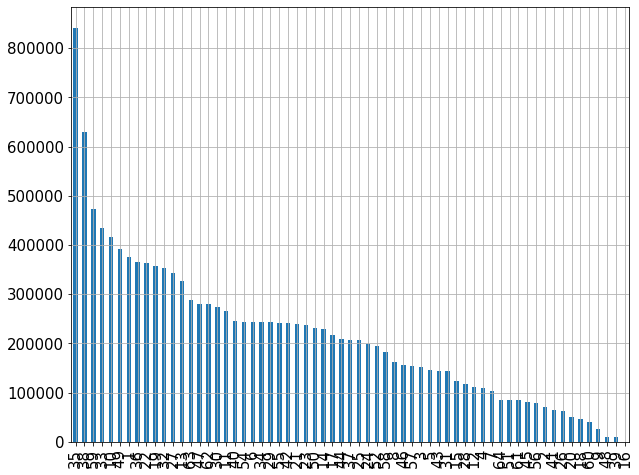

In [38]:
CountStatus = pd.value_counts(data['bank_id'].values,sort=True)
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize = 15)

<AxesSubplot:>

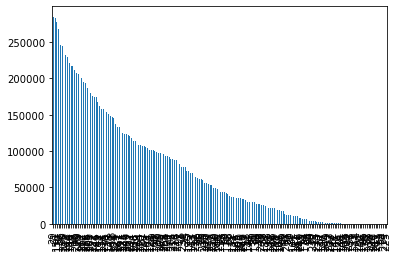

In [39]:
CountStatus = pd.value_counts(data['product_id'].values,sort=True)
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize = 15)

<AxesSubplot:>

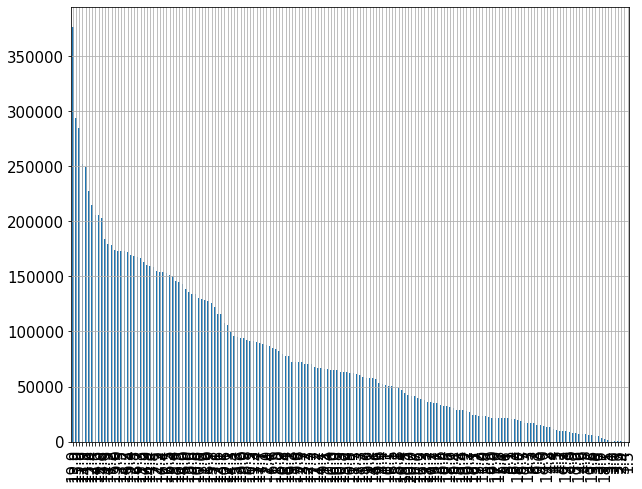

In [36]:
CountStatus = pd.value_counts(data['loan_rate'].values,sort=True)
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize = 15)

feature selection

In [60]:
data = pd.read_csv("C:/merge_user_loan_4.csv")

MemoryError: Unable to allocate 223. MiB for an array with shape (4, 7318965) and data type int64

In [58]:
X = data.drop(columns='신청 여부(타겟)')
y = data['신청 여부(타겟)']

train_x, test_x, train_y, test_y = train_test_split(X,y,train_size=0.7, test_size = 0.3)

print(train_x.shape)

X.head()


,신청서 번호,한도조회 일시,금융사 번호,상품 번호,승인한도,승인금리,신청 여부(타겟),유저 번호,생년월일,성별,...,고용형태,주거소유형태,대출희망금액,대출목적,기대출수,기대출금액,날짜,연령,개인회생 종류,근속월수
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,430982.0,1996.0,1.0,...,정규직,자가,25000000.0,대환대출,2.0,15000000.0,2022-06-07,27.0,CASE1,4
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,430982.0,1996.0,1.0,...,정규직,자가,25000000.0,대환대출,2.0,15000000.0,2022-06-07,27.0,CASE1,4
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,430982.0,1996.0,1.0,...,정규직,자가,25000000.0,대환대출,2.0,15000000.0,2022-06-07,27.0,CASE1,4
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,430982.0,1996.0,1.0,...,정규직,자가,25000000.0,대환대출,2.0,15000000.0,2022-06-07,27.0,CASE1,4
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,430982.0,1996.0,1.0,...,정규직,자가,25000000.0,대환대출,2.0,15000000.0,2022-06-07,27.0,CASE1,4


Correlation 검사

In [46]:
corr = data.corr(method = 'pearson')
print(corr.is_applied)

application_id                         0.000415
bank_id                                0.015787
product_id                             0.034671
loan_limit                            -0.029384
loan_rate                             -0.052392
is_applied                             1.000000
user_id                                0.000225
birth_year                             0.010687
gender                                -0.012281
credit_score                          -0.176748
yearly_income                         -0.006184
company_enter_month                    0.027242
desired_amount                        -0.027016
personal_rehabilitation_yn             0.017199
personal_rehabilitation_complete_yn    0.005190
existing_loan_cnt                      0.080327
existing_loan_amt                     -0.024910
Name: is_applied, dtype: float64


유의미한 변수들을 대략적으로 확인.

- credit_score   /   -0.176748     
- existing_loan_cnt          /            0.080327
- loan_rate        /        -0.052392             
- product_id           /     0.034671             
- loan_limit           /    -0.029384     
- company_enter_month         /           0.027242
- desired_amount               /         -0.027016
- existing_loan_amt             /        -0.024910
- bank_id                      /          0.015787

Forward feature selection

In [49]:
train_x = sm.add_constant(train_x)
model = sm.OLS(train_y,train_x).fit()
print(model.summary())

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const'],k)) :
		# 각 변수 조합을 고려한 경우의수
        
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
	
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    
    return best_model

def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1 :
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [50]:
Forward_best_model = forward_model(X=train_x,y=train_y)

MissingDataError: exog contains inf or nans

In [51]:
alpha = 0.1
lasso= Lasso(alpha = alpha, max_iter = 1000).fit(train_x,train_y)
feature_list = lasso.feature_names_in_[lasso.coef_ != 0]

print(feature_list)

TypeError: invalid type promotion